In [147]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import seaborn as sns

<AxesSubplot:xlabel='Año'>

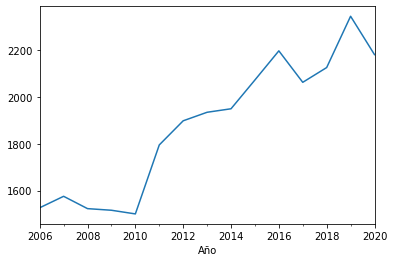

In [51]:
BeerData= pd.read_excel("Beer_Colombia.xlsx")
BeerData=BeerData.set_index('Año')
BeerData['Scatter']=BeerData['Volumen en Mill L'].shift(1)
BeerData['Volumen en Mill L'].plot.line()

<AxesSubplot:xlabel='Año'>

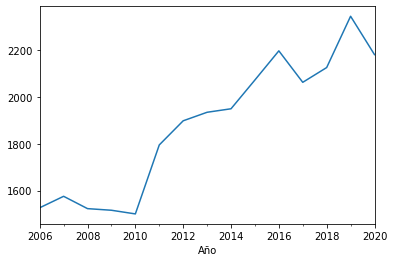

In [52]:
BeerData['Scatter']=BeerData['Volumen en Mill L'].shift(1)
BeerData['Volumen en Mill L'].plot.line()

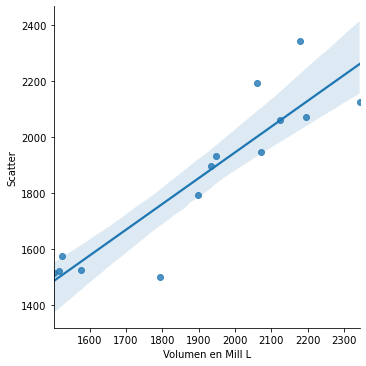

In [53]:
sns.lmplot(x='Volumen en Mill L',y='Scatter',data=BeerData,fit_reg=True)

<AxesSubplot:>

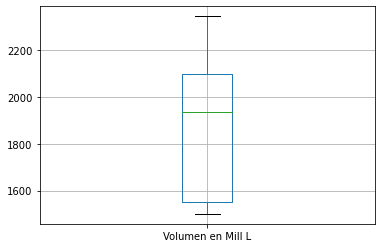

In [54]:
BeerData.boxplot(column=['Volumen en Mill L'])

<AxesSubplot:>

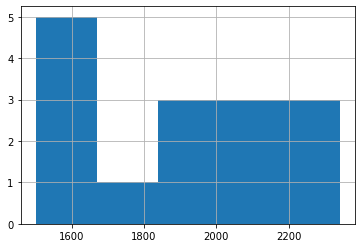

In [55]:
BeerData['Volumen en Mill L'].hist(bins=5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

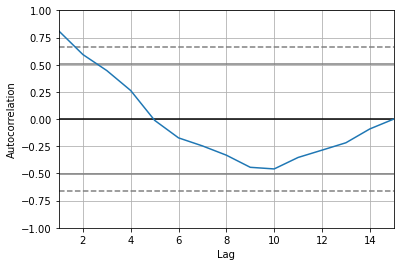

In [56]:
pd.plotting.autocorrelation_plot(BeerData['Volumen en Mill L'])

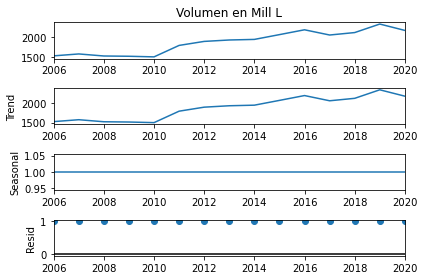

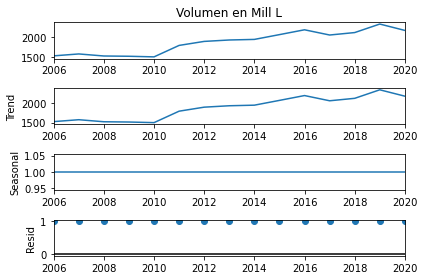

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose 
BeerData_decompose = seasonal_decompose(BeerData['Volumen en Mill L'],model='multiplicative')
BeerData_decompose.plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Año'>

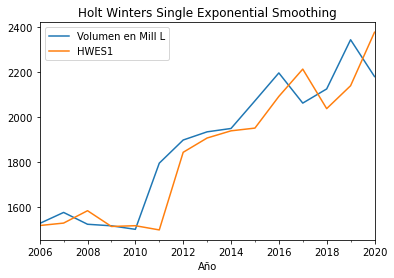

In [134]:

m = 0.43
alpha = 1/(2*m)
BeerData['HWES1'] = SimpleExpSmoothing(BeerData['Volumen en Mill L']).fit(smoothing_level=alpha,optimized=True,use_brute=True).fittedvalues
BeerData[['Volumen en Mill L','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Año'>

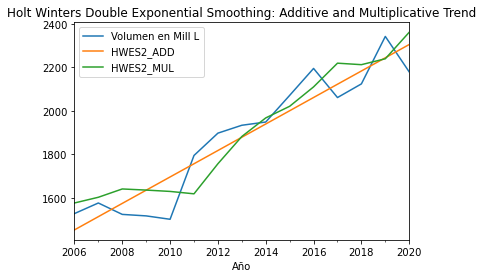

In [59]:
BeerData['HWES2_ADD'] = ExponentialSmoothing(BeerData['Volumen en Mill L'],trend='add').fit().fittedvalues
BeerData['HWES2_MUL'] = ExponentialSmoothing(BeerData['Volumen en Mill L'],trend='mul').fit().fittedvalues
BeerData[['Volumen en Mill L','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Año'>

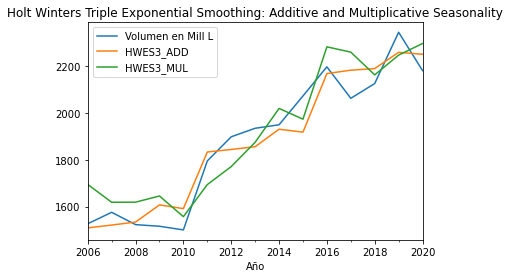

In [99]:
BeerData['HWES3_ADD'] = ExponentialSmoothing(BeerData['Volumen en Mill L'],trend='add',seasonal='add',seasonal_periods=5).fit().fittedvalues
BeerData['HWES3_MUL'] = ExponentialSmoothing(BeerData['Volumen en Mill L'],trend='mul',seasonal='mul',seasonal_periods=5).fit().fittedvalues
BeerData[['Volumen en Mill L','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [109]:
train_BeerData= BeerData[:11]
test_BeerData= BeerData[11:]

,Volumen en Mill L,Scatter,HWES2_ADD,HWES2_MUL,HWES1,HWES3_ADD,HWES3_MUL
Año,,,,,,,
2017-01-01,2061.3,2195.3,2122.631379,2219.565280,2212.279420,2181.082385,2257.978313
2018-01-01,2124.2,2061.3,2183.546305,2212.679237,2036.721955,2187.940845,2161.103158
2019-01-01,2342.7,2124.2,2244.462986,2239.879381,2138.440612,2257.046661,2245.345517
2020-01-01,2179.3,2342.7,2305.519014,2362.006720,2375.951528,2248.837944,2294.717417


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

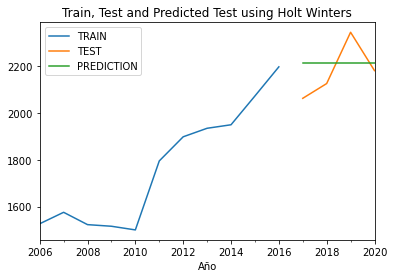

In [167]:
fitted_model = SimpleExpSmoothing(train_BeerData['Volumen en Mill L']).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(4)
train_BeerData['Volumen en Mill L'].plot(legend=True,label='TRAIN')
test_BeerData['Volumen en Mill L'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
Beer=test_BeerData['Volumen en Mill L']
print(f'Mean Absolute Error = {mean_absolute_error(Beer,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(Beer,test_predictions)}')

Mean Absolute Error = 100.61470984888638
Mean Squared Error = 12162.484809136033


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


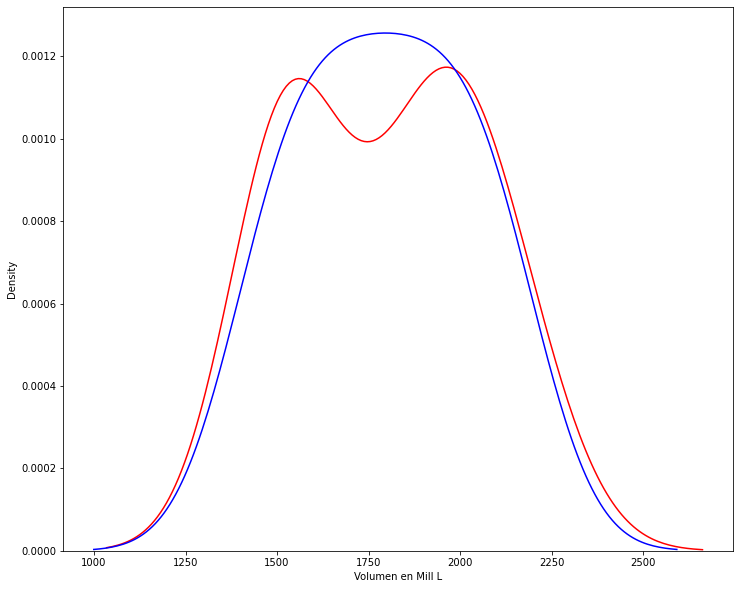

In [163]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
BeerReg=BeerData.reset_index()
BeerReg['X']=np.nan
for i in BeerReg.index:
        BeerReg.loc[i,'X']= i
X_train=BeerReg[:12]
Y_train=BeerReg[:12]
X_test=BeerReg[12:]
Y_test=BeerReg[12:]
lre.fit(X_train[['X']], Y_train['Volumen en Mill L'])
lre.score(X_train[['X']], Y_train['Volumen en Mill L'])
yhat_train = lre.predict(X_train[['X']])
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
Title = 'Predicción vs Valor Real'
DistributionPlot(Y_train['Volumen en Mill L'], yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [156]:
Fitted_modelLR=lre.fit(X_train[['X']], Y_train['Volumen en Mill L'])
test_predictionsLR = Fitted_modelLR.predict(X_test[['X']])

In [164]:
DataFinal=Y_test['Volumen en Mill L']
print(f'Mean Absolute Error Regresion Lineal = {mean_absolute_error(DataFinal,test_predictionsLR)}')
print(f'Mean Squared Error Regresion Lineal = {mean_squared_error(DataFinal,test_predictionsLR)}')
print(f'Mean Absolute Error Winters SES = {mean_absolute_error(Beer,test_predictions)}')
print(f'Mean Squared Error Winters SES = {mean_squared_error(Beer,test_predictions)}')

Mean Absolute Error Regresion Lineal = 109.67020202020194
Mean Squared Error Regresion Lineal = 14620.762357667554
Mean Absolute Error Winters SES = 100.61470984888638
Mean Squared Error Winters SES = 12162.484809136033


In [171]:
Predicciones=test_predictions = fitted_model.forecast(14)
BeerReg
for i in range(15,25):
    BeerReg.loc[i,"Volumen en Mill L"]=lre.coef_*i+lre.intercept_
    if i == 25:
        break
BeerReg

,Año,Volumen en Mill L,Scatter,HWES2_ADD,HWES2_MUL,HWES1,HWES3_ADD,HWES3_MUL,X
0,2006-01-01,1527.000000,NaN,1451.828217,1575.800000,1517.651482,1509.576737,1694.510005,0.0
1,2007-01-01,1575.800000,1527.0,1512.863848,1602.164460,1528.521852,1521.469033,1618.574752,1.0
2,2008-01-01,1523.300000,1575.8,1573.888660,1640.400666,1583.496443,1534.349951,1619.011230,2.0
3,2009-01-01,1516.400000,1523.3,1634.813086,1635.242430,1513.500579,1607.408192,1645.255643,3.0
4,2010-01-01,1500.800000,1516.4,1695.677535,1629.057395,1516.871999,1591.513199,1557.182574,4.0
5,2011-01-01,1794.600000,1500.8,1756.474367,1618.039822,1498.183628,1832.642324,1693.779734,5.0
6,2012-01-01,1897.400000,1794.6,1817.477235,1756.542373,1842.853828,1843.451646,1770.542651,6.0
7,2013-01-01,1933.700000,1897.4,1878.517064,1881.924114,1906.279609,1855.225234,1873.962010,7.0
8,2014-01-01,1948.600000,1933.7,1939.535017,1967.517643,1938.163785,1929.688779,2018.117150,8.0
9,2015-01-01,2071.300000,1948.6,2000.512190,2021.088736,1950.298919,1917.168836,1972.490663,9.0
